In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('AutoData.csv')
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# EDA

In [3]:
df.shape

(205, 25)

In [4]:
df.isnull().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [7]:
#Splitting company name from CarName column
CompanyName = df['make'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)
df.drop(['make'],axis=1,inplace=True)
df.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

There seems to be some spelling error in the CompanyName column.

maxda = mazda, Nissan = nissan, porsche = porcshce, toyota = toyouta, vokswagen = volkswagen = vw

In [9]:
df.CompanyName = df.CompanyName.str.lower()

def replace_name(a,b):
    df.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [10]:
df.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Bivariate Analysis

In [11]:
print(df['price'].max())
print(df['price'].min())

45400.0
5118.0


In [12]:
df.columns

Index(['symboling', 'fueltype', 'CompanyName', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [13]:
da=df[['symboling', 'fueltype', 'CompanyName', 'aspiration', 'doornumber','carbody', 'drivewheel', 'enginelocation', 
       'wheelbase', 'carlength','carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber','enginesize', 
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']]
def price(row):
    if row['price']>=45000:
        return '45000+'
    if row['price']>=40000:
        return '40000+'
    if row['price']>=35000:
        return '35000+'
    elif row['price']>=30000:
        return '30000+'
    elif row['price']>=25000:
        return '25000+'
    elif row['price']>=20000:
        return '20000+'
    elif row['price']>=15000:
        return '15000+'
    elif row['price']>=10000:
        return '10000+'
    else:
        return '5000+'
da['price']=da.apply(price,axis=1)

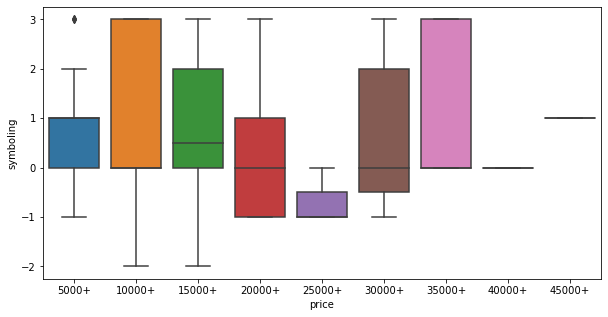

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(y="symboling", x="price", data=da, 
            order=['5000+','10000+','15000+','20000+','25000+','30000+','35000+','40000+','45000+'])
plt.show()

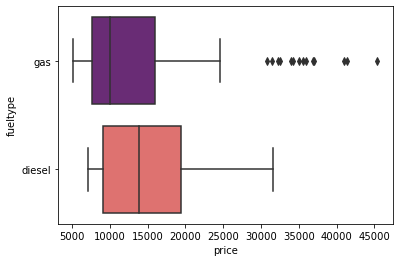

In [15]:
sns.boxplot(x='price',y='fueltype',data=df,palette='magma')

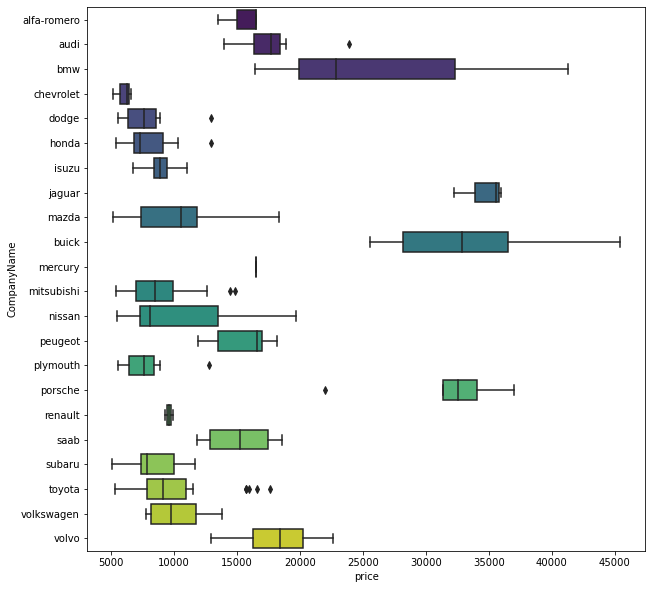

In [16]:
plt.figure(figsize=(10,10))
sns.boxplot(x='price',y='CompanyName',data=df,palette='viridis')
plt.show()

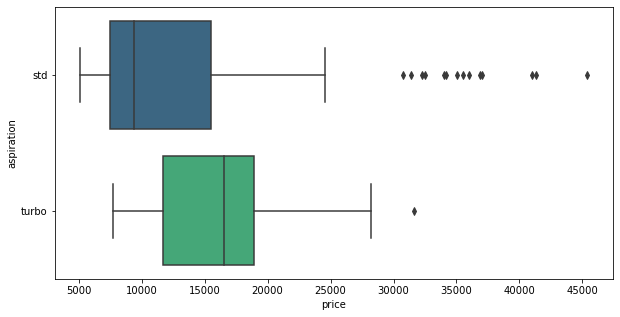

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x='price',y='aspiration',data=df,palette='viridis')
plt.show()

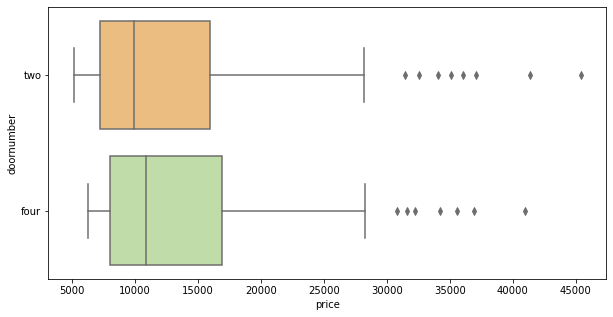

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x='price',y='doornumber',data=df,palette='Spectral')
plt.show()

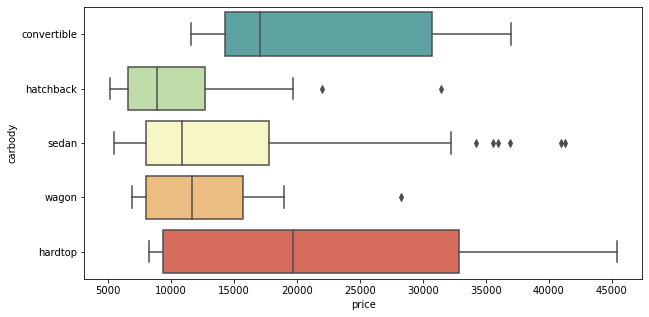

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(x='price',y='carbody',data=df,palette='Spectral_r')
plt.show()

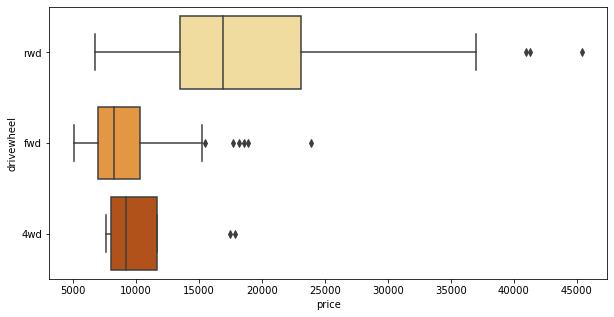

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(x='price',y='drivewheel',data=df,palette='YlOrBr')
plt.show()

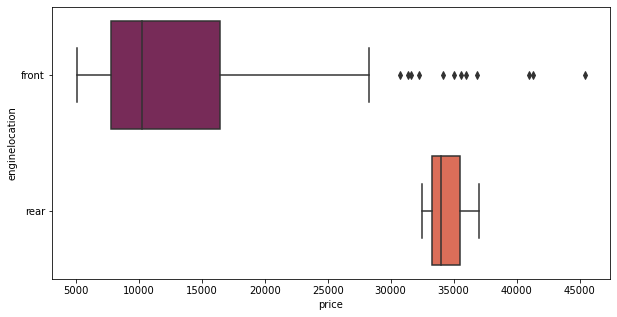

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(x='price',y='enginelocation',data=df,palette='rocket')
plt.show()

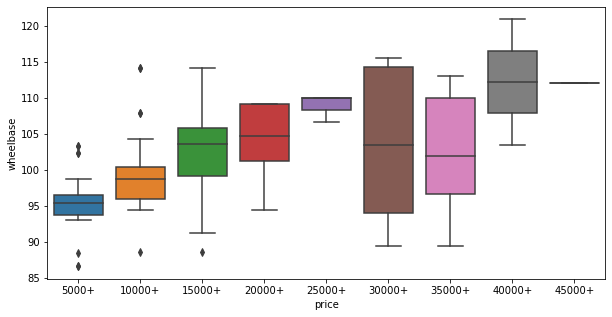

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(y="wheelbase", x="price", data=da, 
            order=['5000+','10000+','15000+','20000+','25000+','30000+','35000+','40000+','45000+'])
plt.show()

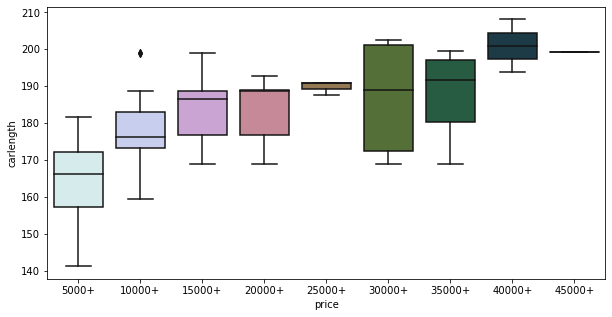

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(y="carlength", x="price", data=da, palette='cubehelix_r',
            order=['5000+','10000+','15000+','20000+','25000+','30000+','35000+','40000+','45000+'])
plt.show()

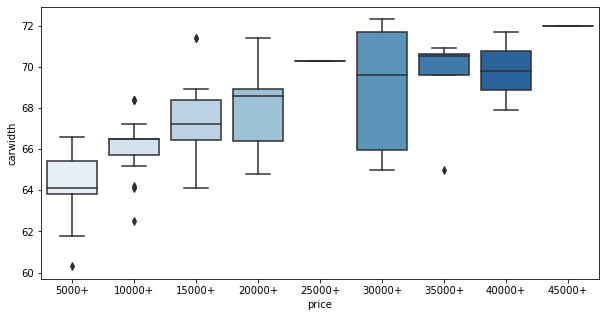

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(y="carwidth", x="price", data=da, palette='Blues',
            order=['5000+','10000+','15000+','20000+','25000+','30000+','35000+','40000+','45000+'])
plt.show()

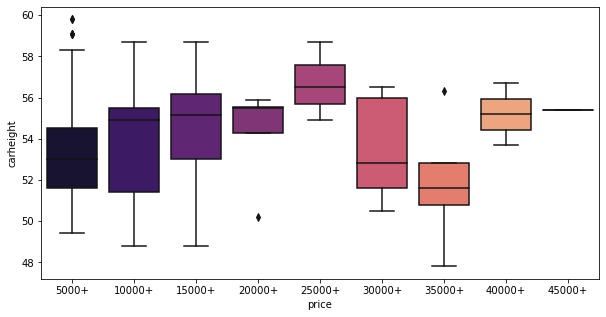

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(y="carheight", x="price", data=da, palette='magma',
            order=['5000+','10000+','15000+','20000+','25000+','30000+','35000+','40000+','45000+'])
plt.show()

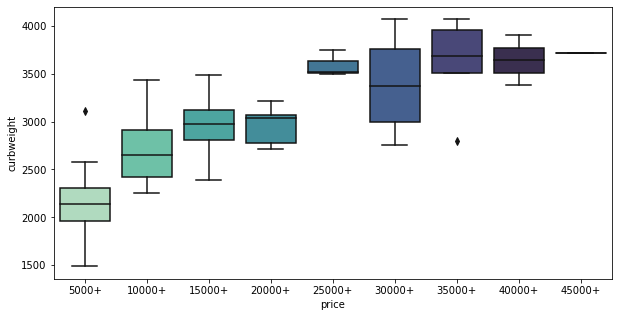

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(y="curbweight", x="price", data=da, palette='mako_r',
            order=['5000+','10000+','15000+','20000+','25000+','30000+','35000+','40000+','45000+'])
plt.show()

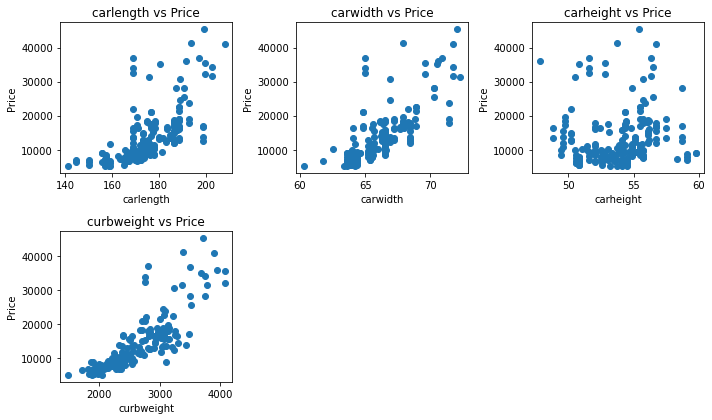

In [27]:
def scatter(x,fig):
    plt.subplot(7,3,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

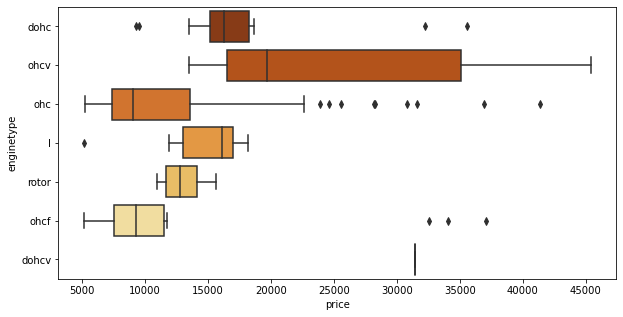

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(x='price',y='enginetype',data=df,palette='YlOrBr_r')
plt.show()

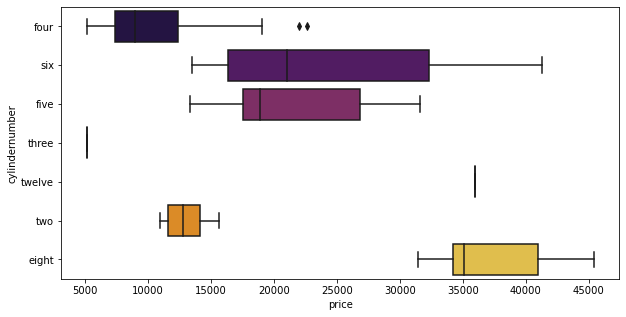

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(x='price',y='cylindernumber',data=df,palette='inferno')
plt.show()

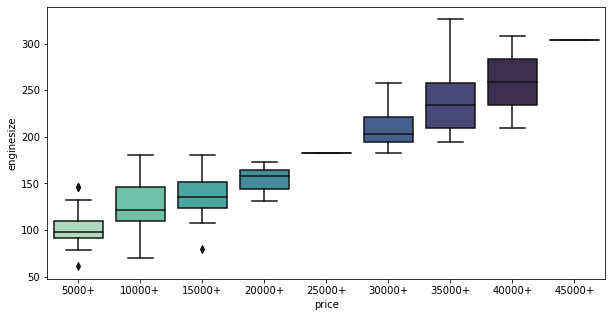

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(y="enginesize", x="price", data=da, palette='mako_r',
            order=['5000+','10000+','15000+','20000+','25000+','30000+','35000+','40000+','45000+'])
plt.show()

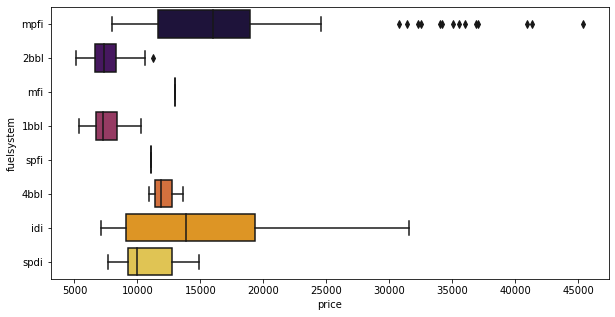

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(x='price',y='fuelsystem',data=df,palette='inferno')
plt.show()

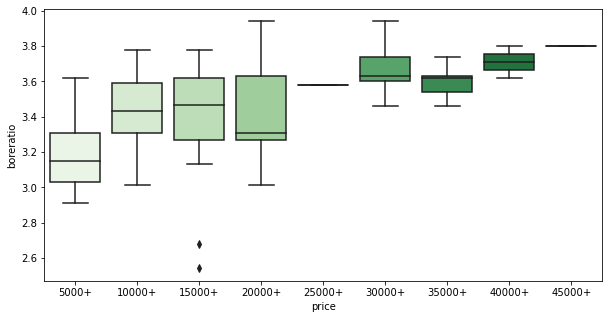

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(y="boreratio", x="price", data=da, palette='Greens',
            order=['5000+','10000+','15000+','20000+','25000+','30000+','35000+','40000+','45000+'])
plt.show()

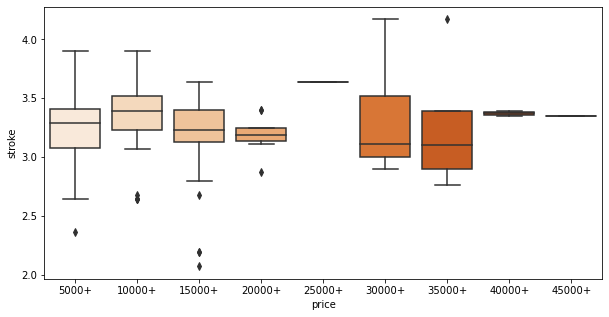

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(y="stroke", x="price", data=da, palette='Oranges',
            order=['5000+','10000+','15000+','20000+','25000+','30000+','35000+','40000+','45000+'])
plt.show()

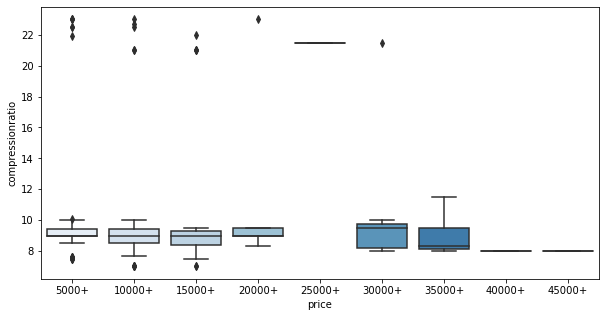

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(y="compressionratio", x="price", data=da, palette='Blues',
            order=['5000+','10000+','15000+','20000+','25000+','30000+','35000+','40000+','45000+'])
plt.show()

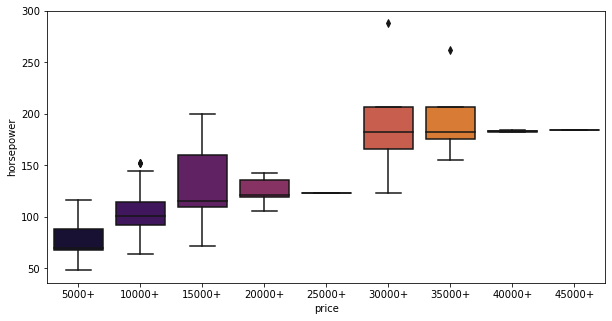

In [35]:
plt.figure(figsize=(10,5))
sns.boxplot(y="horsepower", x="price", data=da, palette='inferno',
            order=['5000+','10000+','15000+','20000+','25000+','30000+','35000+','40000+','45000+'])
plt.show()

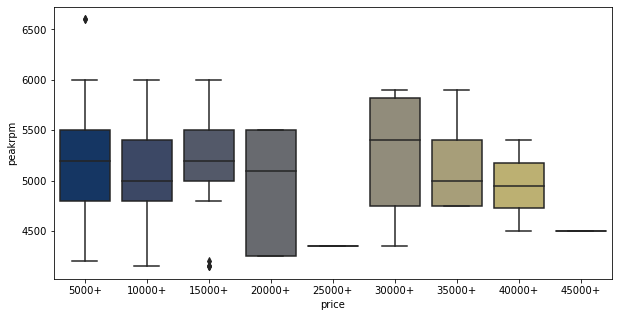

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(y="peakrpm", x="price", data=da, palette='cividis',
            order=['5000+','10000+','15000+','20000+','25000+','30000+','35000+','40000+','45000+'])
plt.show()

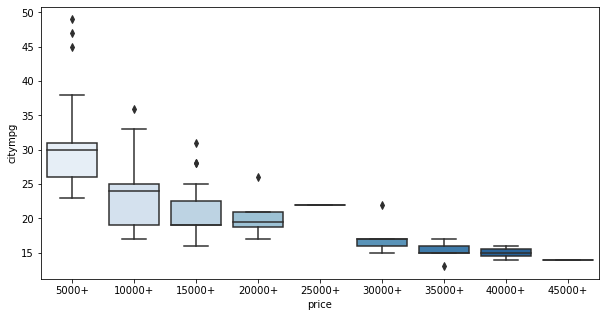

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(y="citympg", x="price", data=da, palette='Blues',
            order=['5000+','10000+','15000+','20000+','25000+','30000+','35000+','40000+','45000+'])
plt.show()

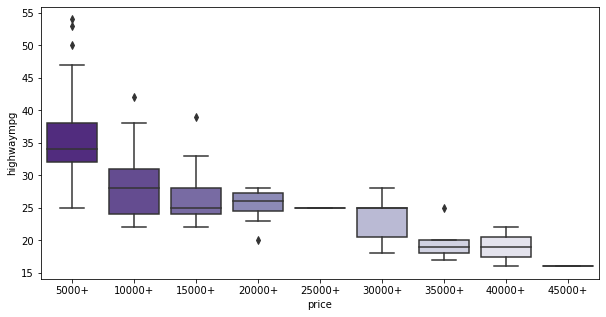

In [38]:
plt.figure(figsize=(10,5))
sns.boxplot(y="highwaympg", x="price", data=da, palette='Purples_r',
            order=['5000+','10000+','15000+','20000+','25000+','30000+','35000+','40000+','45000+'])
plt.show()

# Multivariate Analysis

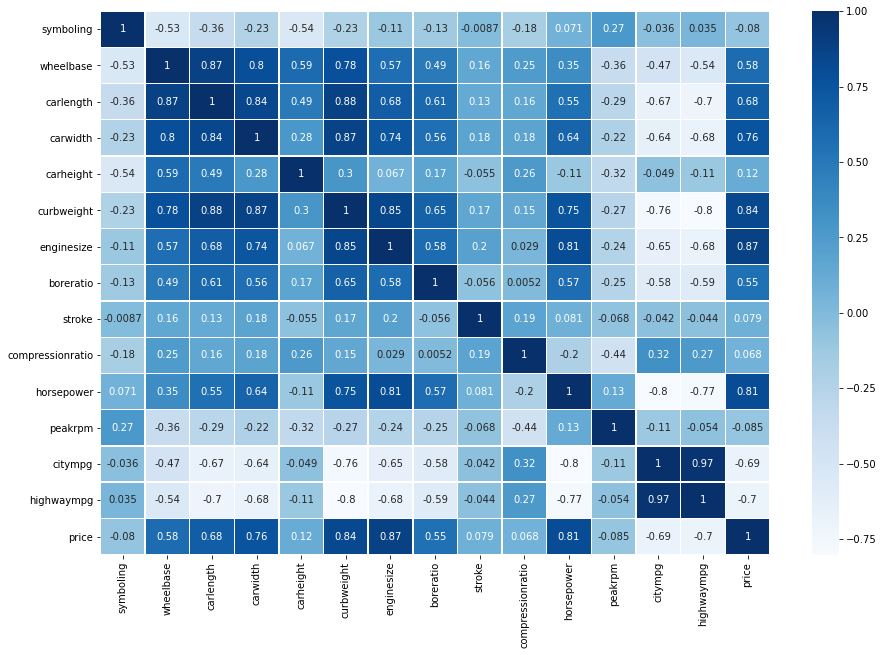

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.4,cmap='Blues')
plt.show()

In [40]:
df.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [41]:
fueltype=df['fueltype']
fueltype=pd.get_dummies(fueltype,drop_first=True)

In [42]:
CompanyName=df['CompanyName']
CompanyName=pd.get_dummies(CompanyName,drop_first=True)

In [43]:
aspiration=df['aspiration']
aspiration=pd.get_dummies(aspiration,drop_first=True)

In [44]:
doornumber=df['doornumber']
doornumber=pd.get_dummies(doornumber,drop_first=True)

In [45]:
carbody=df['carbody']
carbody=pd.get_dummies(carbody,drop_first=True)

In [46]:
drivewheel=df['drivewheel']
drivewheel=pd.get_dummies(drivewheel,drop_first=True)

In [47]:
enginelocation=df['enginelocation']
enginelocation=pd.get_dummies(enginelocation,drop_first=True)

In [48]:
enginetype=df['enginetype']
enginetype=pd.get_dummies(enginetype,drop_first=True)

In [49]:
cylindernumber=df['cylindernumber']
cylindernumber=pd.get_dummies(cylindernumber,drop_first=True)

In [50]:
fuelsystem=df['fuelsystem']
fuelsystem=pd.get_dummies(fuelsystem,drop_first=True)

In [51]:
df1=pd.concat([df,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem],axis=1)

In [52]:
df1.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,0,0,0,0,0,0,0,1,0,0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,0,0,0,0,0,0,0,1,0,0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,0,0,0,0,0,0,0,1,0,0


In [53]:
df1.drop(['fueltype','CompanyName','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'],inplace=True,axis=1)

In [54]:
df1.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


In [55]:
x=df1.drop('price', axis=1)
y=df1['price']

# Train_Test_Split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

# Random Forest Regressor

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
reg=RandomForestRegressor()
reg.fit(x_train,y_train)

RandomForestRegressor()

In [60]:
reg.score(x_train,y_train)

0.9866633851758155

In [61]:
y_pred=reg.predict(x_test)

In [62]:
reg.score(x_test,y_test)

0.956586224248687

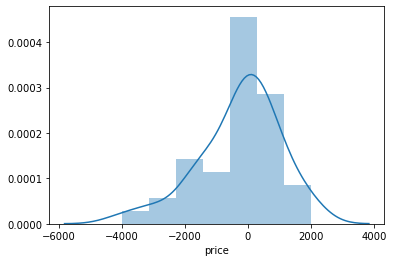

In [63]:
sns.distplot(y_test-y_pred)
plt.show()

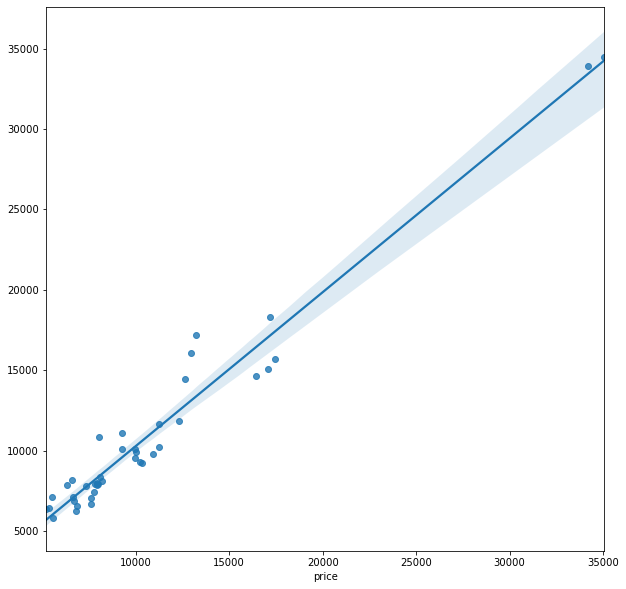

In [64]:
plt.figure(figsize=(10,10))
sns.regplot(x=y_test,y=y_pred)
plt.show()

In [65]:
from sklearn import metrics

In [66]:
print("MAE(Mean_Absolute_Error)=\t",metrics.mean_absolute_error(y_test,y_pred))
print("MSE(Mean_Squared_Error)=\t",metrics.mean_squared_error(y_test,y_pred))
print("RMSE(Root_Mean_Squared_Error)=\t",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE(Mean_Absolute_Error)=	 960.406910487805
MSE(Mean_Squared_Error)=	 1728836.192496392
RMSE(Root_Mean_Squared_Error)=	 1314.8521561363436


In [67]:
metrics.r2_score(y_test,y_pred)

0.956586224248687